In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

In [2]:
xls = pd.ExcelFile('../../../data/raw/partner_i/Dados Históricos - partner_i.xlsx', engine='openpyxl')

In [3]:
xls.sheet_names

['Descrição dados cimento',
 'Descrição dados clinquer',
 'Clinquer 2',
 'Clinquer 1',
 'CPIIE40',
 'CPIIF40']

In [4]:
df_desc_clinker = pd.read_excel(xls, 'Descrição dados clinquer')

In [5]:
df_desc_clinker

,Ensaio,Unidade,Descrição
0,F,%,% F via FRX
1,C3S,%,% alita via cálculo Bogue
2,C3A,%,% aluminato de cálcio via cálculo Bogue
3,CAOL,%,% CaO livre
4,K2O,%,% K2O via FRX
5,RSA,%,Relação enxofre álcalis
6,FSC,admensional,"fator de saturação de cálcio (CaO/(2,8*SiO2+1,..."
7,CAOL DRX,%,% CaOlivre via DRX
8,ALITA,%,% alita via DRX
9,ALITA M1,%,% alita M1 via DRX


# Exploratory Data Analyses - EDA - Clinker 2

<h2>Shape, feature information and some samples</h2>

In [6]:
df = pd.read_excel(xls, 'Clinquer 2')

In [7]:
df.shape

(3089, 34)

In [8]:
df.head()

,Data/Hora,F,C3S,C3A,CAOL,K2O,RSA,FSC,CAOL DRX,ALITA,...,ARCANITA,NA2O,C2S,BELITA,BELITA BETA,BELITA ALFA,BELITA GAMA,C4AF,FERRITA,EQALC
0,2019-02-08 17:00:00,-0.14,-,-,-,1.01,-,100.2,-,-,...,-,0.03,-,-,-,-,-,-,-,-
1,2019-02-09 17:00:00,-0.17,-,-,-,1.15,-,98.1,-,-,...,-,0.04,-,-,-,-,-,-,-,-
2,2019-02-11 13:00:00,-0.19,-,-,-,1.05,-,99.92,-,-,...,-,-0.02,-,-,-,-,-,-,-,-
3,2019-02-12 09:00:00,-0.2,-,-,-,1.02,-,102.38,-,-,...,-,-0.02,-,-,-,-,-,-,-,-
4,2019-02-12 17:00:00,-0.18,-,-,-,1.1,-,103.11,-,-,...,-,-0.03,-,-,-,-,-,-,-,-


In [9]:
df = pd.read_excel(xls, 'Clinquer 2', na_values='-')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3089 entries, 0 to 3088
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Data/Hora    3089 non-null   datetime64[ns]
 1   F            2994 non-null   float64       
 2   C3S          2801 non-null   float64       
 3   C3A          2864 non-null   float64       
 4   CAOL         2848 non-null   float64       
 5   K2O          2994 non-null   float64       
 6   RSA          2544 non-null   float64       
 7   FSC          2994 non-null   float64       
 8   CAOL DRX     2909 non-null   float64       
 9   ALITA        2902 non-null   float64       
 10  ALITA M1     2898 non-null   float64       
 11  ALITA M3     2898 non-null   float64       
 12  C3A TOTAL    2790 non-null   float64       
 13  C3A ORTO     2902 non-null   float64       
 14  C3A CÚBICO   2901 non-null   float64       
 15  MS           2994 non-null   float64       
 16  MA    

In [11]:
df.head()

,Data/Hora,F,C3S,C3A,CAOL,K2O,RSA,FSC,CAOL DRX,ALITA,...,ARCANITA,NA2O,C2S,BELITA,BELITA BETA,BELITA ALFA,BELITA GAMA,C4AF,FERRITA,EQALC
0,2019-02-08 17:00:00,-0.14,NaN,NaN,NaN,1.01,NaN,100.199997,NaN,NaN,...,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-09 17:00:00,-0.17,NaN,NaN,NaN,1.15,NaN,98.099998,NaN,NaN,...,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-02-11 13:00:00,-0.19,NaN,NaN,NaN,1.05,NaN,99.919998,NaN,NaN,...,NaN,-0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-02-12 09:00:00,-0.20,NaN,NaN,NaN,1.02,NaN,102.379997,NaN,NaN,...,NaN,-0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-02-12 17:00:00,-0.18,NaN,NaN,NaN,1.10,NaN,103.110001,NaN,NaN,...,NaN,-0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.tail()

,Data/Hora,F,C3S,C3A,CAOL,K2O,RSA,FSC,CAOL DRX,ALITA,...,ARCANITA,NA2O,C2S,BELITA,BELITA BETA,BELITA ALFA,BELITA GAMA,C4AF,FERRITA,EQALC
3084,2021-11-17 21:00:00,0.02,NaN,7.63156,NaN,0.85,1.470781,100.419998,1.70,68.809998,...,0.75,0.06,NaN,7.97,7.97,0.00,0.00,9.342010,8.84,0.61930
3085,2021-11-18 17:00:00,0.06,61.013557,7.78098,0.89,0.94,1.539365,98.410004,0.89,69.540001,...,0.59,0.08,10.049890,9.81,8.00,1.49,0.32,9.311580,9.04,0.69852
3086,2021-11-19 17:00:00,0.05,62.525299,8.21132,3.11,0.70,1.816733,102.690002,3.11,65.639999,...,0.47,0.05,8.909432,12.92,10.46,1.93,0.52,8.489970,7.22,0.51060
3087,2021-11-20 13:00:00,0.07,62.826744,8.21804,1.16,0.80,1.404729,99.959999,1.16,71.910004,...,0.38,0.06,8.137296,6.22,5.08,0.80,0.34,8.763841,8.60,0.58640
3088,2021-11-20 17:00:00,0.07,61.086231,8.12958,2.52,0.90,1.690315,101.940002,2.52,67.519997,...,0.47,0.07,8.561565,9.39,8.81,0.11,0.47,8.398680,7.63,0.66220


<h2>1. Structure Investigation</h2>

In [13]:
df.dtypes.value_counts()

float64           33
datetime64[ns]     1
dtype: int64

<h3>1.1 Structure of numerical features</h3>

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
F,2994.0,-0.005736,0.171536,-0.550000,-0.070000,-0.020000,0.030000,3.950000
C3S,2801.0,64.485760,3.567040,32.689999,62.340923,64.380096,66.389999,94.269997
C3A,2864.0,8.452456,0.610271,5.560080,8.060659,8.460000,8.850000,11.576440
CAOL,2848.0,1.630530,0.812826,0.000000,1.040000,1.500000,2.080000,6.600000
K2O,2994.0,0.906727,0.107770,0.540000,0.840000,0.900000,0.970000,2.650000
RSA,2544.0,1.352445,0.277293,0.460000,1.164678,1.309251,1.500000,5.580000
FSC,2994.0,101.074904,2.526911,90.221176,99.449368,100.860001,102.347498,122.570000
CAOL DRX,2909.0,1.667394,0.930305,0.000000,1.010000,1.520000,2.160000,9.920000
ALITA,2902.0,67.674363,4.095701,2.910000,65.959999,67.980003,70.040001,77.720001
ALITA M1,2898.0,20.674296,11.708209,0.000000,12.982500,18.275001,25.570000,70.629997


<h3>1.2 Structure of categorical features</h3>

In [15]:
df.describe(exclude='number').T

/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last
Data/Hora,3089,3088,2020-08-14 11:00:00,2,2019-02-08 17:00:00,2021-11-20 17:00:00


<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<AxesSubplot:title={'center':'Unique Values per feature'}>

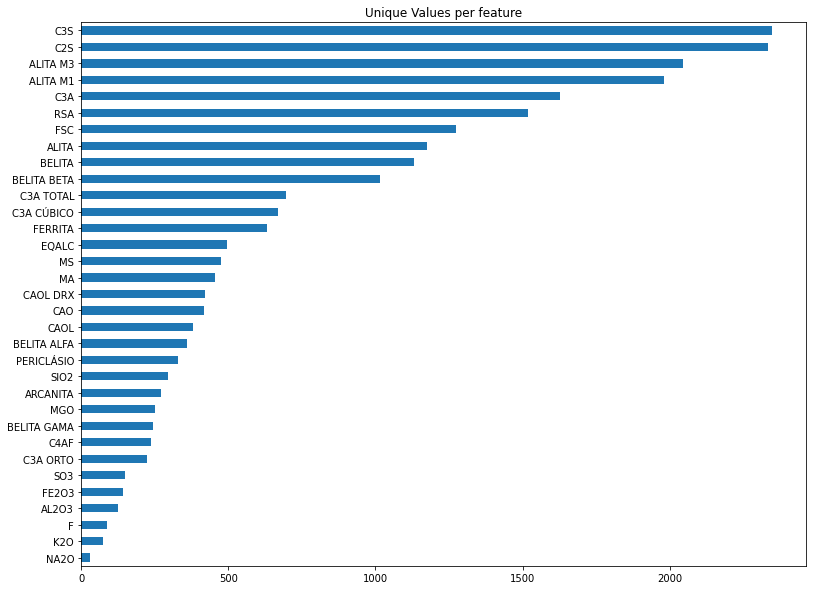

In [16]:
unique_values = df.select_dtypes(include='number').nunique().sort_values()

unique_values.plot.barh(logy=False, figsize=(13, 10), title='Unique Values per feature')

(array([0]), [Text(0, 0, 'Data/Hora')])

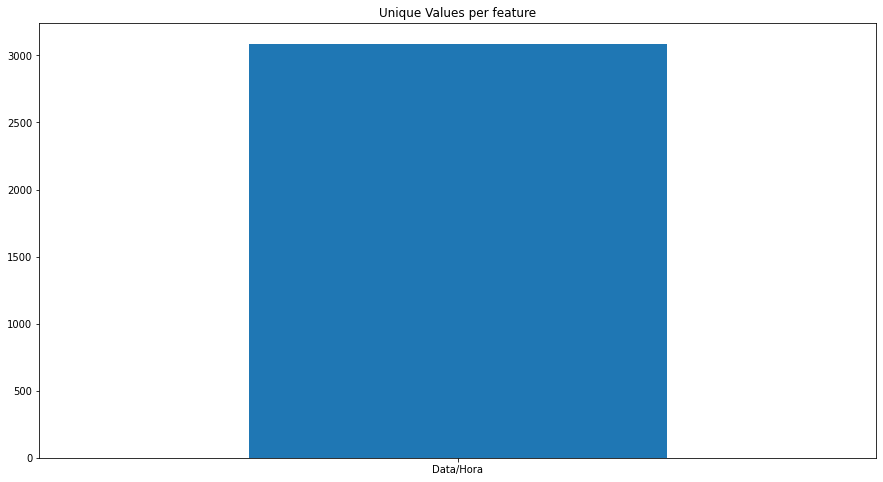

In [17]:
unique_values = df.select_dtypes(exclude='number').nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title='Unique Values per feature')

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [18]:
print("There are", df.isna().any().sum(), "variables with missing values from a total of", df.shape[1])

There are 33 variables with missing values from a total of 34


In [19]:
print("There are a total of ", df.isna().sum().sum(), "missing values.")

There are a total of  7004 missing values.


In [20]:
df.isna().sum()

Data/Hora        0
F               95
C3S            288
C3A            225
CAOL           241
K2O             95
RSA            545
FSC             95
CAOL DRX       180
ALITA          187
ALITA M1       191
ALITA M3       191
C3A TOTAL      299
C3A ORTO       187
C3A CÚBICO     188
MS              95
MA              95
SO3             95
CAO             95
SIO2            95
AL2O3           95
FE2O3           95
MGO             95
PERICLÁSIO     192
ARCANITA       187
NA2O            95
C2S            288
BELITA         187
BELITA BETA    526
BELITA ALFA    526
BELITA GAMA    526
C4AF           226
FERRITA        187
EQALC          297
dtype: int64

/home/felipe/Documents/ccs28-venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count of quantity of missing values')

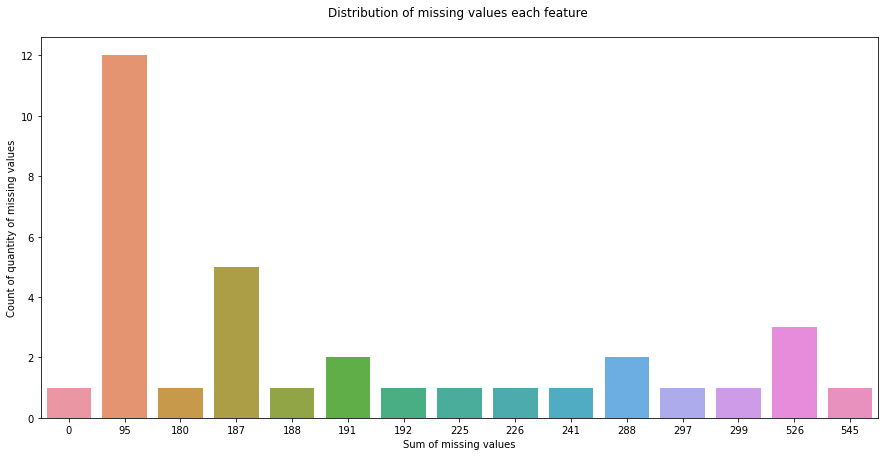

In [21]:
plt.figure(figsize=(15,7))
sns.countplot(df.isna().sum())
plt.title('Distribution of missing values each feature \n')
plt.xlabel('Sum of missing values')
plt.ylabel('Count of quantity of missing values')

<h3>2.3. Percentage of zeros</h3>

<BarContainer object of 34 artists>

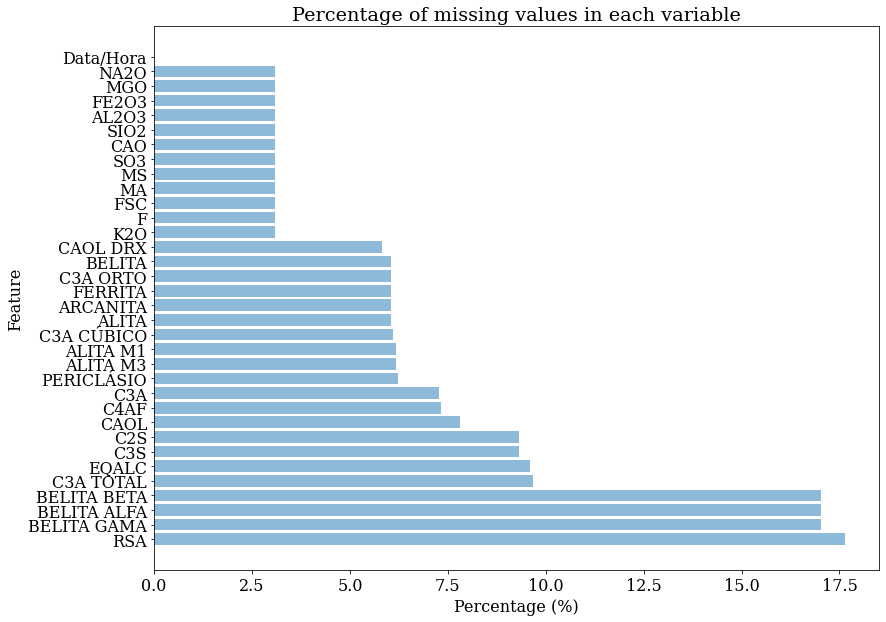

In [22]:
miss_perc = df.isnull().sum()/df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc('font', family='serif', size=16)
plt.figure(figsize=(13,10))
plt.title('Percentage of missing values in each variable')
plt.xlabel('Percentage (%)')
plt.ylabel('Feature')
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

<h3>2.4. Duplicates</h3>

In [23]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


In [24]:
n_duplicates = df.drop('Data/Hora', axis=1).duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 2 duplicates samples.


<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

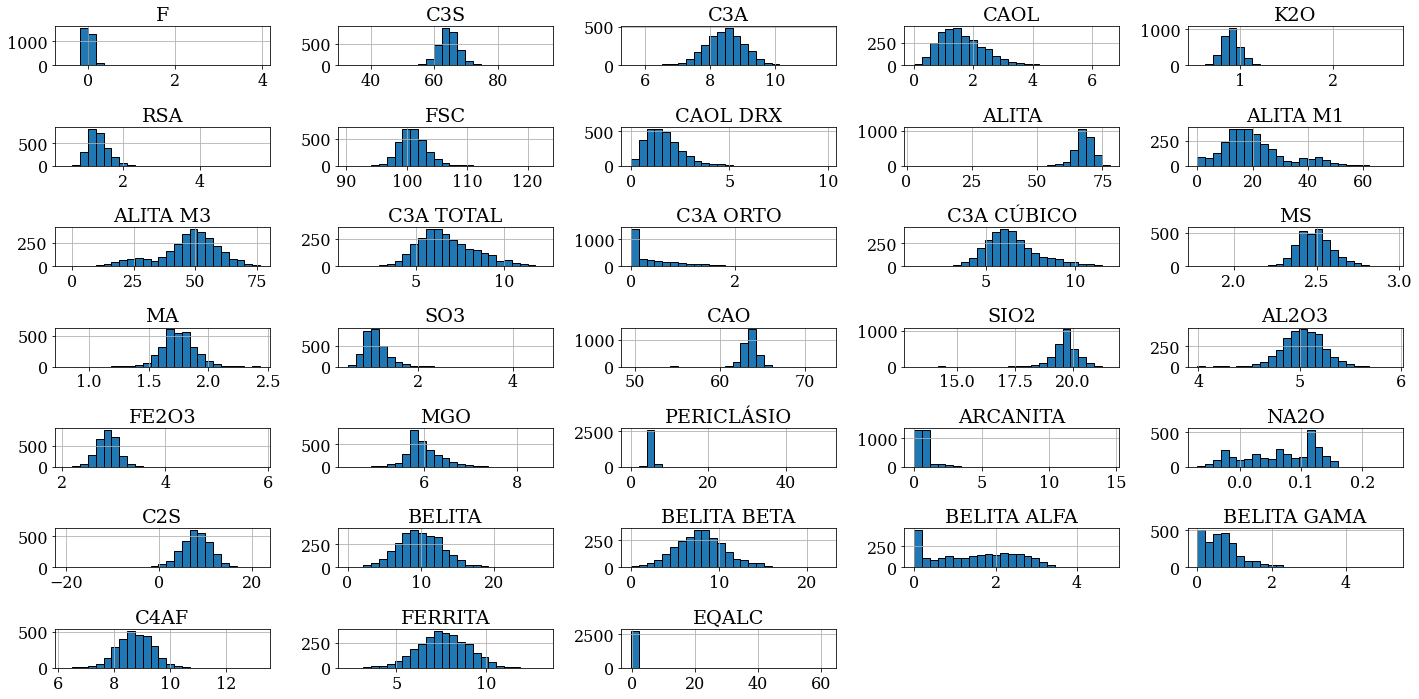

In [25]:
df.hist(bins=25, figsize=(20, 10), layout=(-1, 5), edgecolor='black')
plt.tight_layout()

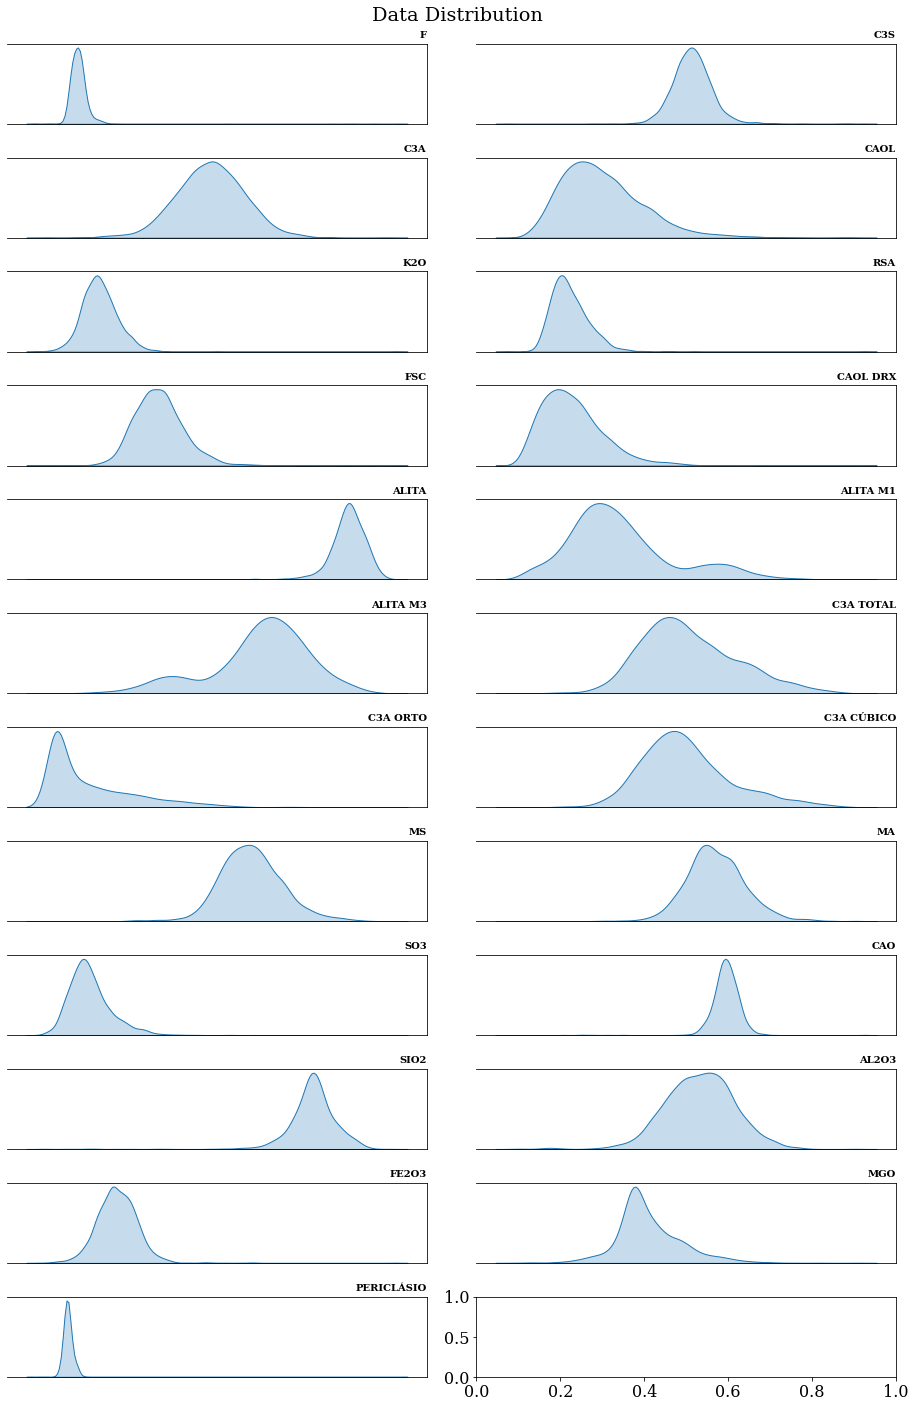

In [26]:
fig, axes = plt.subplots(12, 2,figsize=(13, 20))
axes = axes.flatten()
sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include='float64').columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette = ["#2a9d8f"], shade=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['left'].set_visible(False)
    ax.set_title(columns[i], loc='right', weight='bold', fontsize=10)
    if i+1 == 23:
        break

fig.suptitle('Data Distribution')

fig.tight_layout()
plt.show()

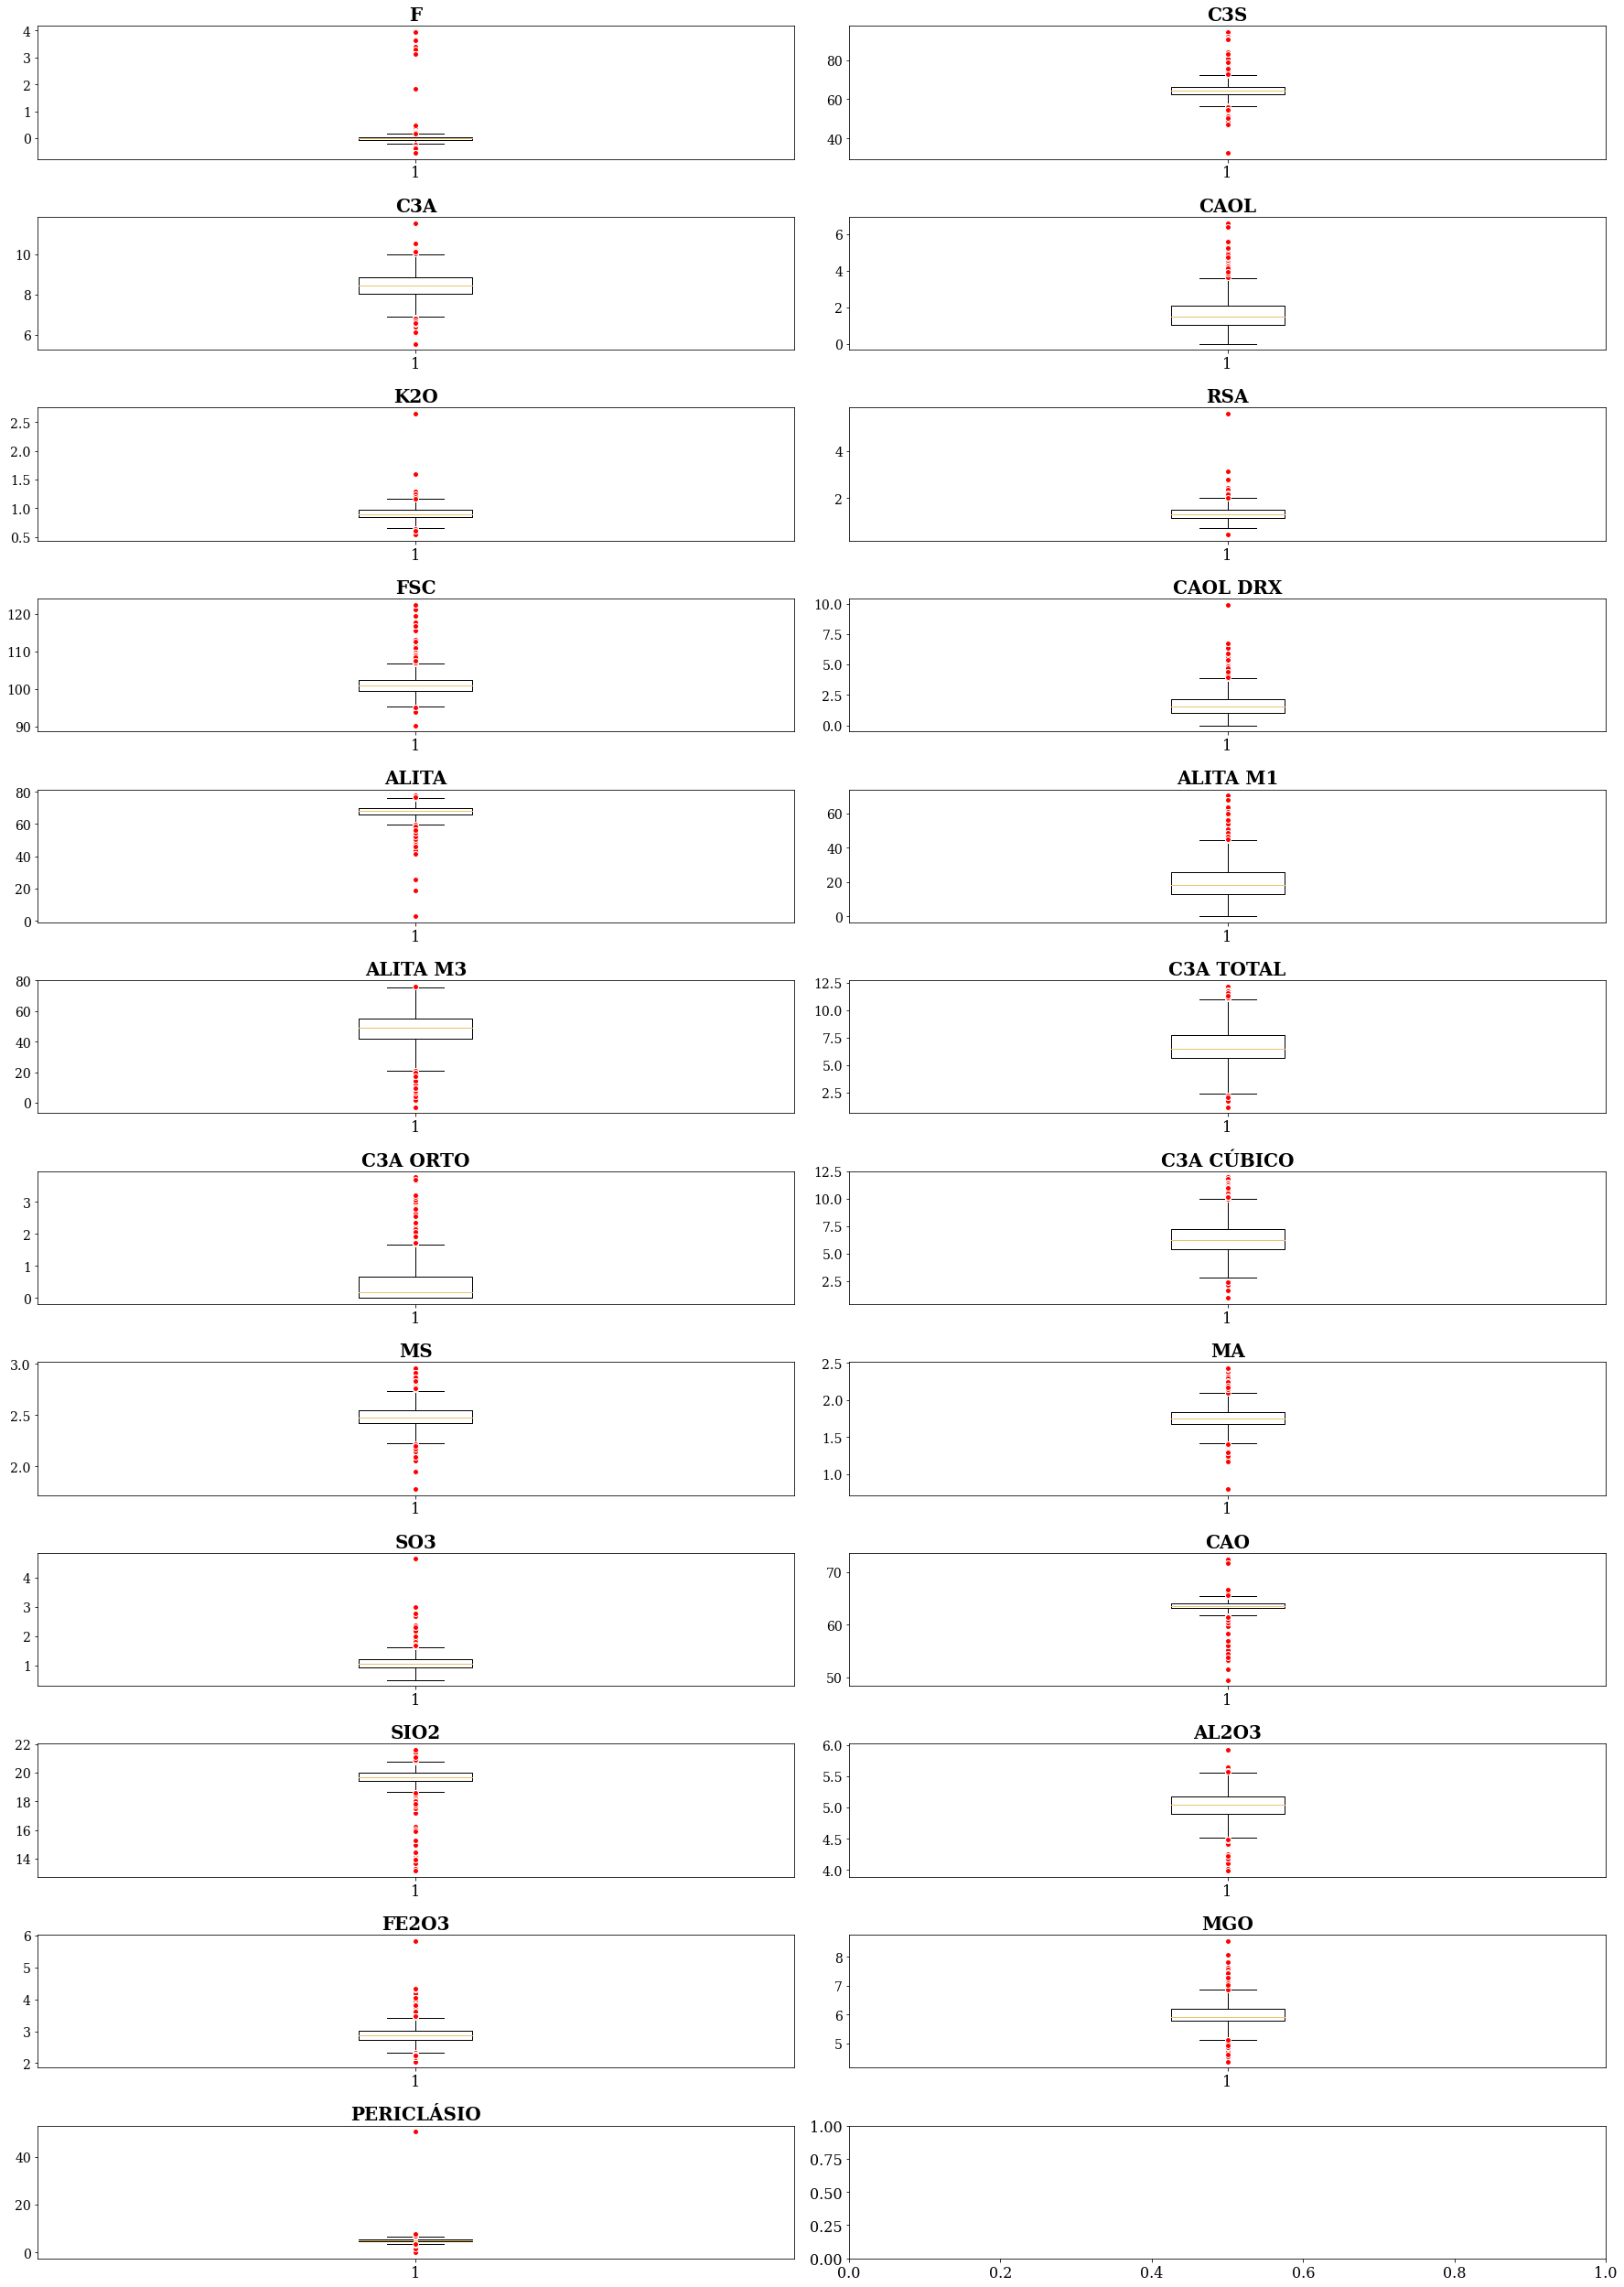

In [27]:
#Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include='float64').columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(12, 2, figsize=(25,35))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:,i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    if i + 1 == 23:
        break

plt.tight_layout()

<h3>3.3. Feature Relationship</h3>

<h3>Correlation Matrix heatmap</h3>

<AxesSubplot:>

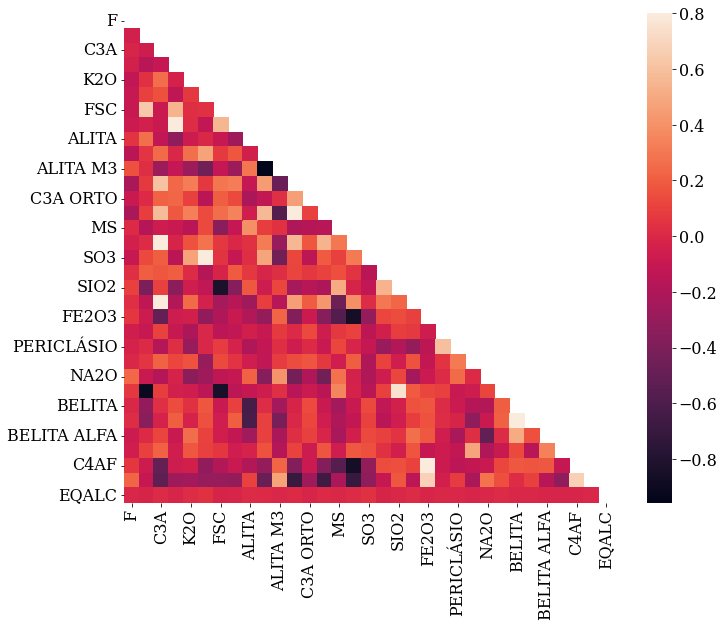

In [28]:
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, mask=mask, vmax=.8, square=True)

<AxesSubplot:>

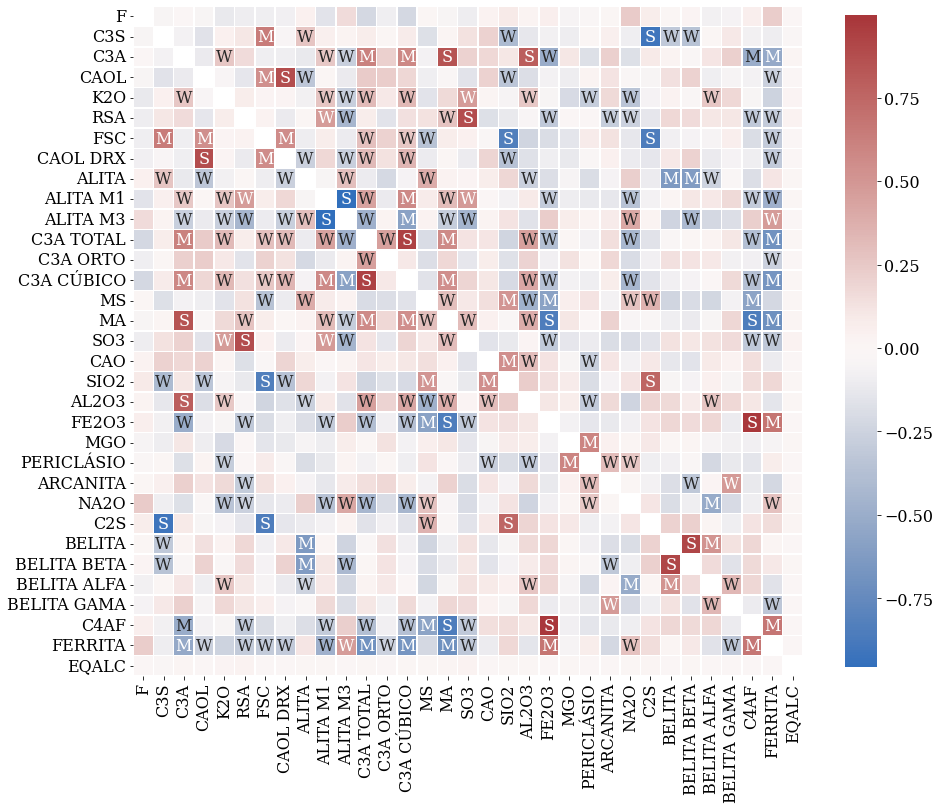

In [29]:
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(
    np.abs(df_corr) > 0.75,
    "S",
    np.where(np.abs(df_corr) > 0.5, "M", np.where(np.abs(df_corr) > 0.25, "W", "")),
)

# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(
    df_corr,
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

<AxesSubplot:>

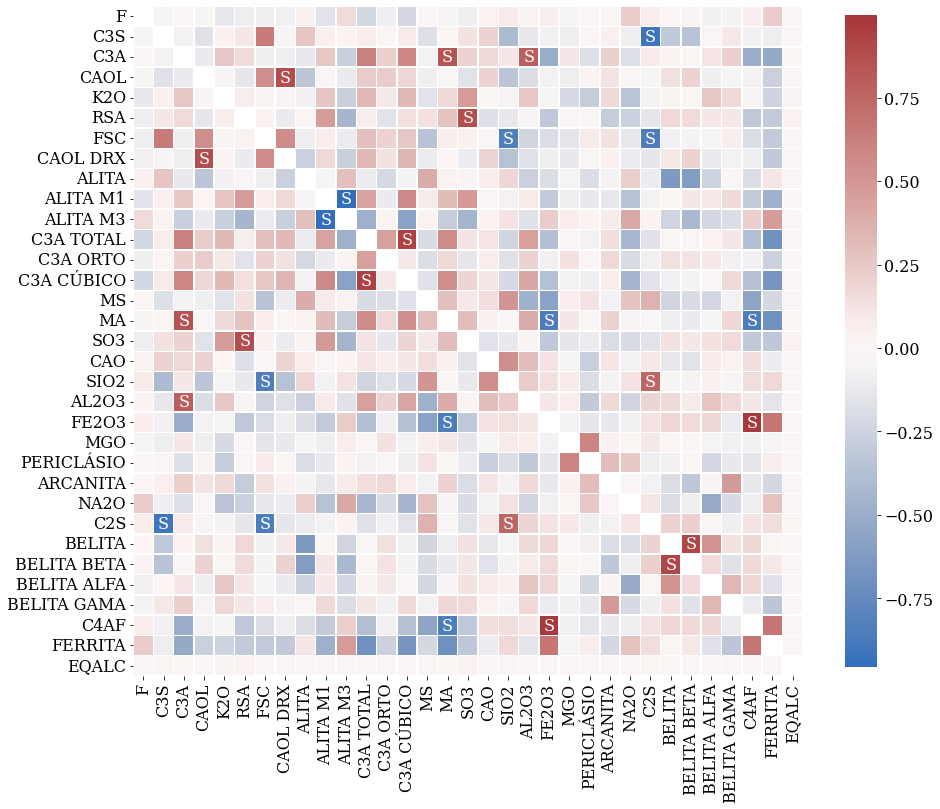

In [30]:
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr) > 0.75, "S", "")


# Plot correlation matrix
plt.figure(figsize=(15, 15))

sns.heatmap(
    df_corr,
    mask=np.eye(len(df_corr)),
    square=True,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

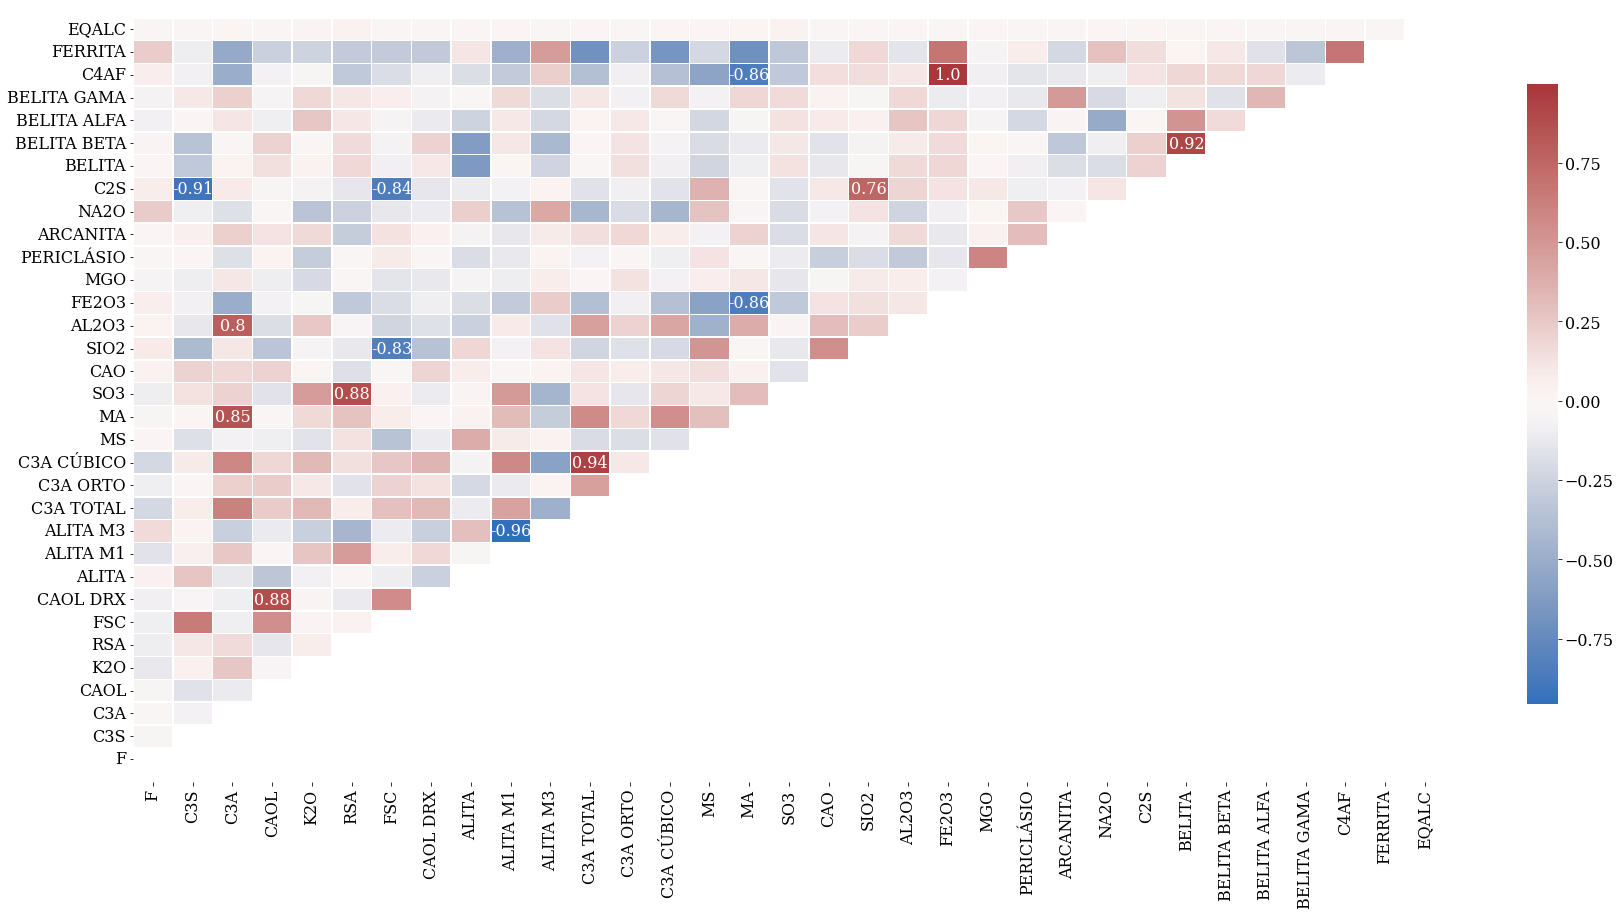

In [31]:
df_corr = df.corr(method="pearson")

labels = np.where(
    np.abs(df_corr) > 0.75, np.round(df_corr[np.abs(df_corr) > 0.75], 2), ""
)

plt.figure(figsize=(25, 13))

ax = sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .5, top-.5)

bottom, top = ax.get_xlim()
ax.set_ylim(bottom - .5, top+.5)

plt.tight_layout()

None

In [32]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    return None

In [33]:
corr_matrix = df.corr(method="pearson").abs()

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

sol[sol > 0.75]

FE2O3      C4AF           0.998013
ALITA M1   ALITA M3       0.957238
C3A TOTAL  C3A CÚBICO     0.941998
BELITA     BELITA BETA    0.917763
C3S        C2S            0.906759
RSA        SO3            0.882591
CAOL       CAOL DRX       0.880073
MA         C4AF           0.857934
           FE2O3          0.856178
C3A        MA             0.851405
FSC        C2S            0.843504
           SIO2           0.833187
C3A        AL2O3          0.797123
SIO2       C2S            0.755848
dtype: float64

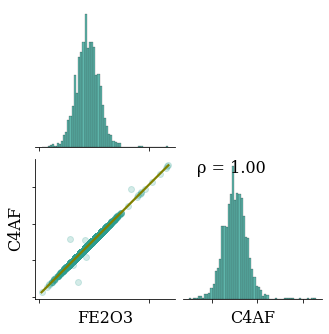

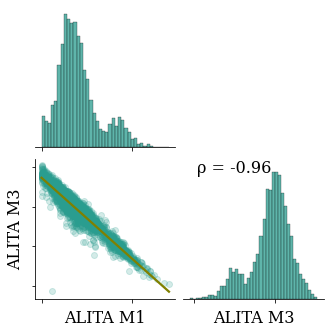

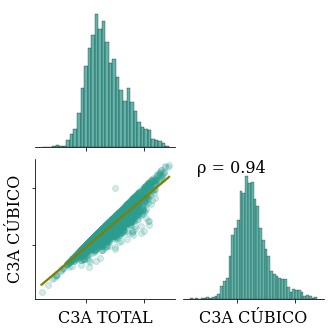

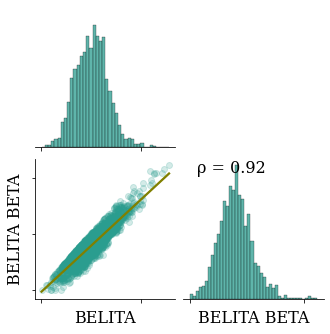

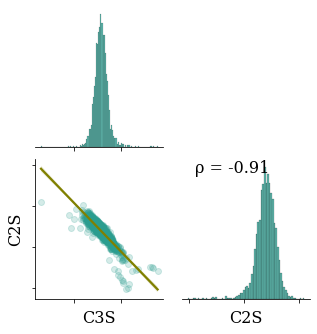

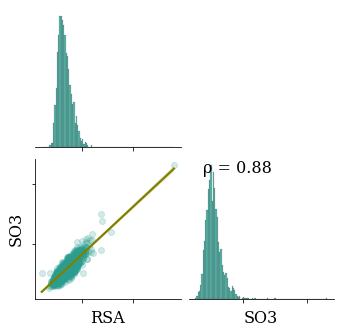

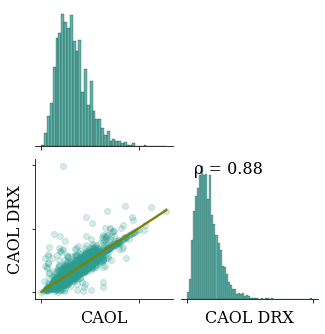

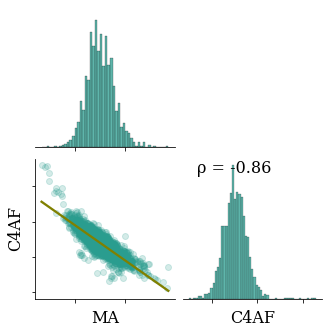

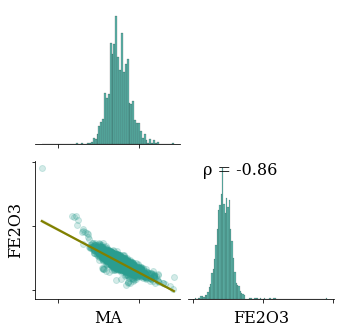

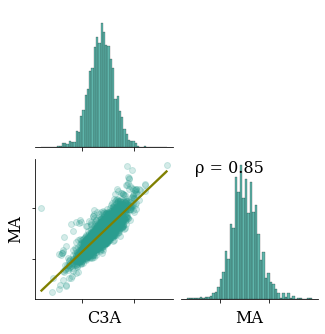

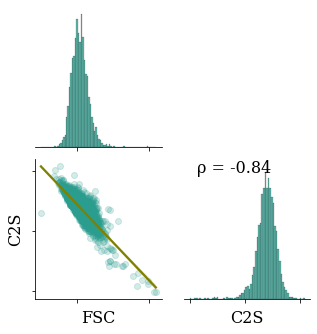

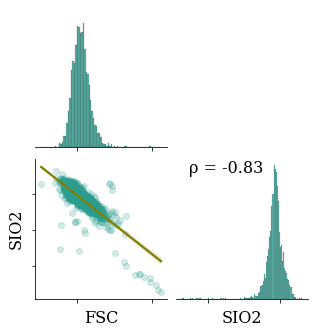

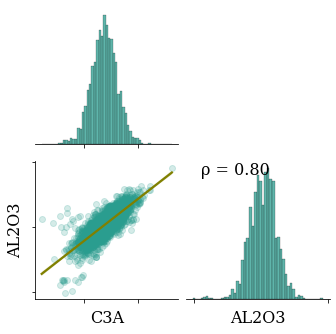

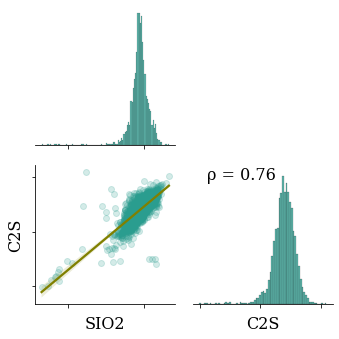

In [34]:
for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind='reg',
            plot_kws={
                'line_kws':{'color':'olive'},
                'scatter_kws': {'alpha': 0.2}
        })
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()